# 경제학과 주가 예측 프로그램 만들기

### Matplotlib에서 폰트 설정

In [1]:
import urllib
from matplotlib import font_manager
from matplotlib import pyplot as plt

font_path = 'NanumGothic.ttf'
with open(font_path, 'wb') as f: 
    f.write(urllib.request.urlopen("https://github.com/team-monolith-product/jupyter-nanum/raw/main/NanumGothic.ttf").read())

# 글꼴을 등록합니다.
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

### [Step1] 데이터 로드

In [2]:
import pandas as pd

df = pd.read_csv('datasets/애플.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.490000,30.642857,30.340000,30.572857,26.419203,123432400
1,2010-01-05,30.657143,30.798571,30.464285,30.625713,26.464878,150476200
2,2010-01-06,30.625713,30.747143,30.107143,30.138571,26.043921,138040000
3,2010-01-07,30.250000,30.285715,29.864286,30.082857,25.995777,119282800
4,2010-01-08,30.042856,30.285715,29.865715,30.282858,26.168606,111902700
...,...,...,...,...,...,...,...
2664,2020-08-04,436.529999,443.160004,433.549988,438.660004,437.870514,43267900
2665,2020-08-05,437.510010,441.570007,435.589996,440.250000,439.457642,30498000
2666,2020-08-06,441.619995,457.649994,439.190002,455.609985,454.790009,50607200
2667,2020-08-07,452.820007,454.700012,441.170013,444.450012,444.450012,49453300


### [Step2] 데이터 파악하기

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2669 entries, 0 to 2668
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2669 non-null   object 
 1   Open       2669 non-null   float64
 2   High       2669 non-null   float64
 3   Low        2669 non-null   float64
 4   Close      2669 non-null   float64
 5   Adj Close  2669 non-null   float64
 6   Volume     2669 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 146.1+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2.669000e+03
mean,122.237387,123.451400,121.070255,122.319193,115.658460,7.301983e+07
std,73.708071,74.670970,72.970780,73.920576,75.577866,5.778380e+07
min,27.481428,28.000000,27.178572,27.435715,23.708282,1.136200e+07
25%,66.860001,67.412857,66.368568,66.815712,58.982941,3.093120e+07
50%,104.889999,106.000000,104.410004,105.220001,97.411713,5.248120e+07
75%,163.089996,164.520004,160.559998,163.029999,157.422363,9.936780e+07
max,452.820007,457.649994,441.170013,455.609985,454.790009,4.702495e+08


### [Step3] 데이터 시각화하기

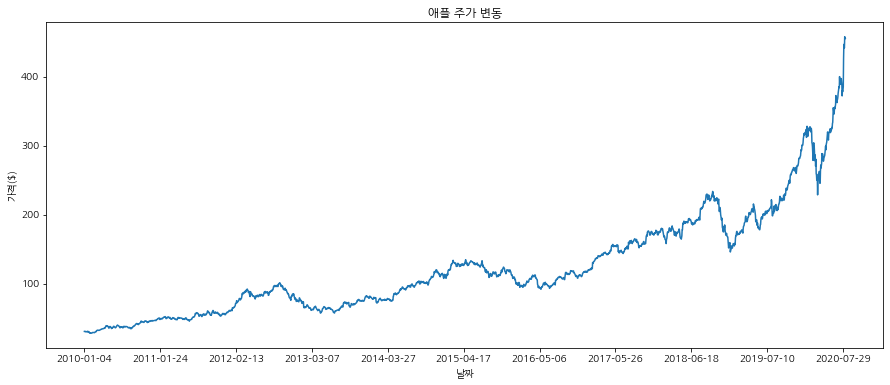

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,6)) # 그래프의 크기를 (15,6)으로 정합니다.

plt.plot(df['High'])
plt.xticks(range(0, len(df), len(df)//10), labels = [df.iloc[x,0][:10] for x in range(0, len(df), len(df)//10)]) # x축에 표시되는 값들을 정합니다.
plt.title('애플 주가 변동')
plt.xlabel('날짜')
plt.ylabel('가격($)')
plt.show()

### [Step4] 데이터 형태 변형하기

In [6]:
import numpy as np

data = None
for i in range(12): # 12일의 연속되는 데이터를 묶어줍니다.
    tmp = np.array(df['High'].iloc[i:-(12-i)]).reshape(-1,1) # i 번째 데이터를 만듭니다.
    if data is None:
        data = tmp
    else:
        data = np.concatenate((data,tmp), axis = 1) # i 번째 데이터를 합칩니다.
        
data

array([[ 30.642857,  30.798571,  30.747143, ...,  30.228571,  30.741428,
         30.792856],
       [ 30.798571,  30.747143,  30.285715, ...,  30.741428,  30.792856,
         30.472857],
       [ 30.747143,  30.285715,  30.285715, ...,  30.792856,  30.472857,
         29.642857],
       ...,
       [397.      , 391.899994, 388.309998, ..., 446.549988, 443.160004,
        441.570007],
       [391.899994, 388.309998, 371.880005, ..., 443.160004, 441.570007,
        457.649994],
       [388.309998, 371.880005, 379.619995, ..., 441.570007, 457.649994,
        454.700012]])

### [Step5] 데이터를 학습데이터와 검증데이터로 나누기

In [8]:
train ,test = data[:int(len(data)*0.8)], data[int(len(data)*0.8):] # Dataset을 학습데이터와 테스트데이터로 나눕니다.
train_x, train_y = train[:,:6],train[:,6:] # Data를 label과 input으로 나눕니다.
test_x, test_y = test[:,:6],test[:,6:] # Data를 label과 input으로 나눕니다.

train_x = train_x.reshape(-1,6,1) # Data를 모델에 들어가는 형태로 바꿉니다.
train_y = train_y.reshape(-1,6,1) # Data를 모델에 들어가는 형태로 바꿉니다.
test_x = test_x.reshape(-1,6,1) # Data를 모델에 들어가는 형태로 바꿉니다.
test_y = test_y.reshape(-1,6,1) # Data를 모델에 들어가는 형태로 바꿉니다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(2125, 6, 1) (532, 6, 1) (2125, 6, 1) (532, 6, 1)


### [Step6] 모델 구성하기

In [9]:
from tensorflow import keras

# keras를 사용해 모델을 구성합니다.
model = keras.Sequential([
    keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(optimizer="adam", metrics=["mse"], loss="mae") # 학습방법을 세팅합니다.

model.build(train_x.shape)
model.summary() # 모델의 정보를 보여줍니다.

2022-06-24 05:18:37.883437: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (2125, 6, 256)           133120    
 l)                                                              
                                                                 
 dense (Dense)               (2125, 6, 64)             16448     
                                                                 
 dense_1 (Dense)             (2125, 6, 1)              65        
                                                                 
Total params: 149,633
Trainable params: 149,633
Non-trainable params: 0
_________________________________________________________________


### [Step7] 모델 학습하기

In [10]:
# early_stop을 설정합니다.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# 모델을 학습 시킵니다.
history = model.fit(train_x, train_y, epochs=100,
                    validation_data=(test_x, test_y), 
                    callbacks=[early_stop])

Epoch 1/100
67/67 [==============================] - 7s 42ms/step - loss: 99.2689 - mse: 15659.0322 - val_loss: 60.8716 - val_mse: 7491.3711
Epoch 2/100
67/67 [==============================] - 2s 29ms/step - loss: 34.3569 - mse: 3752.1599 - val_loss: 14.2048 - val_mse: 1178.3557
Epoch 3/100
67/67 [==============================] - 2s 29ms/step - loss: 10.1012 - mse: 739.6761 - val_loss: 7.5105 - val_mse: 317.7985
Epoch 4/100
67/67 [==============================] - 2s 30ms/step - loss: 6.6961 - mse: 279.2296 - val_loss: 5.3633 - val_mse: 144.7650
Epoch 5/100
67/67 [==============================] - 2s 29ms/step - loss: 5.3329 - mse: 140.7072 - val_loss: 4.5445 - val_mse: 92.9933
Epoch 6/100
67/67 [==============================] - 2s 29ms/step - loss: 5.0105 - mse: 101.2893 - val_loss: 4.8502 - val_mse: 79.3054
Epoch 7/100
67/67 [==============================] - 2s 30ms/step - loss: 4.5025 - mse: 78.1940 - val_loss: 4.6345 - val_mse: 73.8633
Epoch 8/100
67/67 [=======================

### [Step8] 학습결과 시각화하기

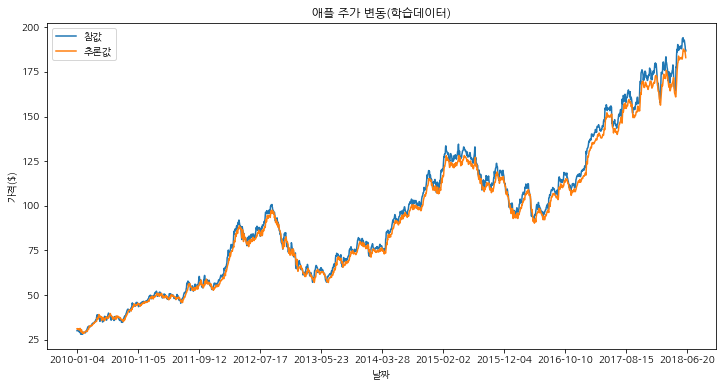

In [16]:
# 학습데이터의 추론 결과

fig = plt.figure(figsize = (12,6)) # 그래프의 크기를 (12,6)으로 설정합니다.
result = np.array(model(train_x)[:,0,:]).reshape(-1)  # 그래프에 결과를 표시할 수 있도록 output의 첫번째 결과를 뽑아옵니다.
target = train_y[:,0,:].reshape(-1) # 참값의 그래프를 그리기 위해 label의 첫번째 값을 뽑아옵니다.
plt.plot(target)
plt.plot(result)
plt.title('애플 주가 변동(학습데이터)')
plt.legend(['참값', '추론값'])
plt.xlabel('날짜')
plt.ylabel('가격($)')
train_df = df[:int(len(df)*0.8)]
plt.xticks(range(0, len(train_df), len(train_df)//10), labels = [train_df.iloc[x,0][:10] for x in range(0, len(train_df), len(train_df)//10)]) # x 축에 표시될 값을 설정합니다.
plt.show()

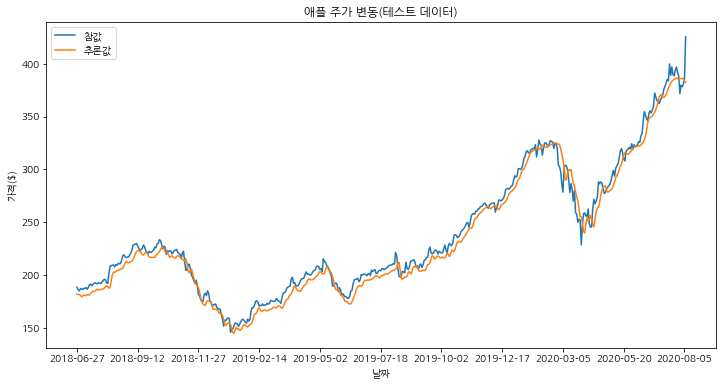

In [17]:
# 검증데이터의 추론 결과

fig = plt.figure(figsize = (12,6)) # 그래프의 크기를 (12,6)으로 설정합니다.
result = np.array(model(test_x)[:,0,:]).reshape(-1)  # 그래프에 결과를 표시할 수 있도록 output의 첫번째 결과를 뽑아옵니다.
target = test_y[:,0,:].reshape(-1) # 참값의 그래프를 그리기 위해 label의 첫번째 값을 뽑아옵니다.
plt.plot(target)
plt.plot(result)
plt.title('애플 주가 변동(테스트 데이터)')
plt.legend(['참값', '추론값'])
plt.xlabel('날짜')
plt.ylabel('가격($)')
test_df = df[int(len(df)*0.8):]
plt.xticks(range(0, len(test_df), len(test_df)//10), labels = [test_df.iloc[x,0][:10] for x in range(0, len(test_df), len(test_df)//10)]) # x 축에 표시될 값을 설정합니다.
plt.show()